In [1]:
import numpy as np
import tensorflow as tf
from utilities import Load_Cifar10_Data
from model import Model
import os

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = Load_Cifar10_Data()
noise_infos = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(7)]
model = Model(noise_infos,"new_pretrained_1/model")

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model


# Single Step(Non Target)

In [ ]:
model.reset(noise_infos)

In [44]:
from attack import validate_target_model
validate_target_model(model)

accuracy on benign data: 0.8377000033855438


(128, 32, 32, 3)
success rate for non target attack is: 0.8671875
linf distortion: 0.028921598307423156
l2 distortion: 0.0008894423839410976


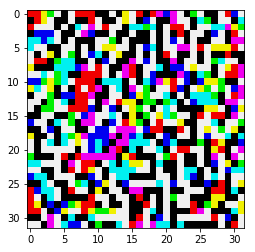

In [41]:
target = None 
from attack import filter_data
x_filtered,y_filtered = filter_data(model,x_test,y_test,target = target)
params = {
    "eps": 8/255,
    "target": target,
    "clip_min":0,
    "clip_max":1,
    "batch_size":128,
    "loss_type":"cw",
    "norm":"linf",
    "conf":0,
    "alpha":0
}
from attack import white_box_single_step
adv_imgs = white_box_single_step(model,x_filtered,y_filtered,params)
from attack import compute_success_rate
compute_success_rate(model,adv_imgs,y_filtered, target = target)
from attack import compute_distortion
print("linf distortion:",compute_distortion(x_filtered,adv_imgs,"linf"))
print("l2 distortion:",compute_distortion(x_filtered,adv_imgs,"l2"))
import matplotlib.pyplot as plt
plt.imshow(np.clip(adv_imgs[0] - x_filtered[0] + 8/255,a_min = 0,a_max =1)*255)

In [46]:
noise_infos = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(4)
              ] + [
    {"kernel":{
        "type": "mul",
        "func": tf.random_uniform,
        "params":{
            "minval":0,
            "maxval":10
        }
        
    },"bias":{
        "type": "mul",
        "func": tf.random_uniform,
        "params": {
            "minval":0,
            "maxval":10
        }
    }} for i in range(3)
]

In [47]:
model.reset(noise_infos,"new_pretrained_1/model")
compute_success_rate(model,adv_imgs,y_filtered,target)

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
success rate for non target attack is: 0.8125


0.8125

# Single Step(Target)

In [5]:
noise_infos_1 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(7)]
noise_infos_2 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(4)
              ] + [
    {"kernel":{
        "type": "mul",
        "func": tf.random_uniform,
        "params":{
            "minval":0,
            "maxval":10
        }
        
    },"bias":{
        "type": "mul",
        "func": tf.random_uniform,
        "params": {
            "minval":0,
            "maxval":10
        }
    }} for i in range(3)
]
model.reset(noise_infos_2)

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model


In [7]:
avg_rate = 0
avg_transfer_rate = 0
avg_linf = 0
avg_l2 = 0
for i in range(10):
    target = i
    from attack import filter_data
    x_filtered,y_filtered = filter_data(model,x_test,y_test,target = target)
    params = {
        "eps": 8/255,
        "target": target,
        "clip_min":0,
        "clip_max":1,
        "batch_size":128,
        "loss_type":"cw",
        "norm":"linf",
        "conf":0,
        "alpha":0
    }
    from attack import white_box_single_step
    adv_imgs = white_box_single_step(model,x_filtered,y_filtered,params)
    from attack import compute_success_rate
    avg_rate += 0.1 * compute_success_rate(model,adv_imgs,y_filtered, target = target)
    model.reset(noise_infos_2)
    avg_transfer_rate += 0.1 * compute_success_rate(model,adv_imgs,y_filtered, target = target)
    model.reset(noise_infos_2)
    from attack import compute_distortion
    avg_linf += 0.1 * compute_distortion(x_filtered,adv_imgs,"linf")
    avg_l2 += 0.1* compute_distortion(x_filtered,adv_imgs,"l2")
print("avg success rate:",avg_rate)
print("avg transfer success rate:",avg_transfer_rate)
print("linf distortion:",avg_linf)
print("l2 distortion:",avg_l2)

(128, 32, 32, 3)
sccess rate for target attack on class 0 is 0.1796875
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
sccess rate for target attack on class 0 is 0.171875
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
(128, 32, 32, 3)
sccess rate for target attack on class 1 is 0.328125
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
sccess rate for target attack on class 1 is 0.2578125
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 

# Iterative(Non Target)

In [23]:
noise_infos_1 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(7)]
noise_infos_2 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(4)
              ] + [
    {"kernel":{
        "type": "mul",
        "func": tf.random_uniform,
        "params":{
            "minval":0,
            "maxval":10
        }
        
    },"bias":{
        "type": "mul",
        "func": tf.random_uniform,
        "params": {
            "minval":0,
            "maxval":10
        }
    }} for i in range(3)
]
model.reset(noise_infos_1)

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model


In [24]:
target = None
from attack import filter_data
x_filtered,y_filtered = filter_data(model,x_test,y_test,target = target)
params = {
    "eps": 8/255,
    "target": target,
    "nb_iter": 10,
    "eps_iter":1/255,
    "clip_min":0,
    "clip_max":1,
    "batch_size":128,
    "loss_type":"cw",
    "norm":"linf",
    "conf":0,
    "alpha":0
}
from attack import white_box_iterative
adv_imgs = white_box_iterative(model,x_filtered,y_filtered,params)
from attack import compute_success_rate
compute_success_rate(model,adv_imgs,y_filtered, target = target)
from attack import compute_distortion
print("linf distortion:",compute_distortion(x_filtered,adv_imgs,"linf"))
print("l2 distortion:",compute_distortion(x_filtered,adv_imgs,"l2"))
#plt.imshow(np.clip(adv_imgs[0] - x_filtered[0] + 8/255,a_min = 0,a_max =1) * 500)
model.reset(noise_infos_2)
compute_success_rate(model,adv_imgs,y_filtered, target = target)

(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
success rate for non target attack is: 1.0
linf distortion: 0.00879292183866103
l2 distortion: 6.438672683425275e-05
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
success rate for non target attack is: 0.796875


0.796875

# Iterative(Target)

In [8]:
noise_infos_1 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(7)]
noise_infos_2 = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(4)
              ] + [
    {"kernel":{
        "type": "mul",
        "func": tf.random_uniform,
        "params":{
            "minval":0,
            "maxval":10
        }
        
    },"bias":{
        "type": "mul",
        "func": tf.random_uniform,
        "params": {
            "minval":0,
            "maxval":10
        }
    }} for i in range(3)
]
model.reset(noise_infos_2)

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model


In [10]:
avg_rate = 0
avg_transfer_rate = 0
avg_linf = 0
avg_l2 = 0
for i in range(10):
    target = i
    from attack import filter_data
    x_filtered,y_filtered = filter_data(model,x_test,y_test,target = target)
    params = {
        "eps": 8/255,
        "target": target,
        "nb_iter": 10,
        "eps_iter":1/255,
        "clip_min":0,
        "clip_max":1,
        "batch_size":128,
        "loss_type":"cw",
        "norm":"linf",
        "conf":0,
        "alpha":0
    }
    from attack import white_box_iterative
    adv_imgs = white_box_iterative(model,x_filtered,y_filtered,params)
    from attack import compute_success_rate
    avg_rate += 0.1 * compute_success_rate(model,adv_imgs,y_filtered, target = target)
    model.reset(noise_infos_2)
    avg_transfer_rate += 0.1 * compute_success_rate(model,adv_imgs,y_filtered, target = target)
    model.reset(noise_infos_2)
    from attack import compute_distortion
    avg_linf += 0.1 * compute_distortion(x_filtered,adv_imgs,"linf")
    avg_l2 += 0.1* compute_distortion(x_filtered,adv_imgs,"l2")
print("avg success rate:",avg_rate)
print("avg transfer success rate:",avg_transfer_rate)
print("linf distortion:",avg_linf)
print("l2 distortion:",avg_l2)

(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
sccess rate for target attack on class 0 is 0.875
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
sccess rate for target attack on class 0 is 0.8828125
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
(128, 32, 32, 3)
sccess rate for target attack on class 1 is 0.8671875
out shape: (?, 30, 30, 64)
out sha

# Test Training

In [ ]:
import tensorflow as tf
import numpy as np
from utilities import Load_Cifar10_Data
from model import Model
(x_train, y_train), (x_test, y_test) = Load_Cifar10_Data()
noise_infos = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(7)]
model = Model(noise_infos,None)
print(model.test(x_train,y_train))
print(model.test(x_test,y_test))

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
0.09806000038981436
0.0964999996125698


In [2]:
noise_infos = [{"kernel":{"type":"none"},"bias":{"type":"none"}} for i in range(4)
              ] + [
    {"kernel":{
        "type": "mul",
        "func": tf.random_normal,
        "params":{
            "mean":1,
            "stddev":0.5
        }
        
    },"bias":{
        "type": "mul",
        "func": tf.random_normal,
        "params": {
            "mean":1,
            "stddev":0.5
        }
    }} for i in range(3)
]
model.reset(noise_infos)

out shape: (?, 30, 30, 64)
out shape: (?, 28, 28, 64)
out shape: (?, 12, 12, 128)
out shape: (?, 10, 10, 128)
out shape: (?, 256)
out shape: (?, 256)
out shape: (?, 10)
INFO:tensorflow:Restoring parameters from new_pretrained_1/model


In [3]:
from attack import validate_target_model
validate_target_model(model)

accuracy on benign data: 0.8377000033855438


In [3]:
model.test(x_train[:10000],y_train[:10000])

0.10150000005960465

In [ ]:
model.train(x_train, y_train , x_test, y_test, epoch = 60, learning_rate = 0.0001,weight_decay = 1e-5,init_path = None,save_path = "model/clean",optimizer = "adam")

[<tf.Variable 'conv/conv2d_1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>, <tf.Variable 'conv/conv2d_1/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'conv/conv2d_2/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv/conv2d_3/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>, <tf.Variable 'conv/conv2d_3/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'conv/conv2d_4/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>, <tf.Variable 'conv/conv2d_4/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'conv/dense_1/kernel:0' shape=(3200, 256) dtype=float32_ref>, <tf.Variable 'conv/dense_1/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'conv/dense_2/kernel:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'conv/dense_2/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'conv/dense_3/kernel:0' shape=(256, 10) dtype=float32_ref>, <tf.Variable 'conv/dense_3/bias:0' shape=(10,) dt

In [26]:
from attack import validate_target_model
validate_target_model(model)

accuracy on benign data: 0.7163000166416168


In [17]:
target = None
from attack import filter_data
x_filtered,y_filtered = filter_data(model,x_test,y_test,target = target)
params = {
    "eps": 8/255,
    "target": target,
    "clip_min":0,
    "clip_max":1,
    "batch_size":128,
    "loss_type":"cw",
    "norm":"linf",
    "conf":0,
    "alpha":0
}
from attack import white_box_single_step
adv_imgs = white_box_single_step(model,x_filtered,y_filtered,params)
from attack import compute_success_rate
compute_success_rate(model,adv_imgs,y_filtered, target = target)

(128, 32, 32, 3)
success rate for non target attack is: 0.84375


0.84375